<a href="https://colab.research.google.com/github/TakshSoni123/SafetyValue/blob/master/SafetyValue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 1.0MB 2.6MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=6a5a8db55a73d5cdfc819a16c5932cce65f8385f3dbb951392d60a167e266d27
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [ ]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


###CRIME DATA PREPROCESS


In [ ]:
url = '/content/drive/My Drive/Dataset/Safety Score/'
df1 = pd.read_csv(url+'crime1.csv')
df2 = pd.read_csv(url+'crime2.csv')
df3 = pd.read_csv(url+'crime3.csv')

In [ ]:
print(df1.columns.values)
print(df2.columns.values)
print(df3.columns.values)

['STATE/UT' 'DISTRICT' 'YEAR' 'MURDER' 'ATTEMPT TO MURDER'
 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER' 'RAPE' 'CUSTODIAL RAPE'
 'OTHER RAPE' 'KIDNAPPING & ABDUCTION'
 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'
 'KIDNAPPING AND ABDUCTION OF OTHERS' 'DACOITY'
 'PREPARATION AND ASSEMBLY FOR DACOITY' 'ROBBERY' 'BURGLARY' 'THEFT'
 'AUTO THEFT' 'OTHER THEFT' 'RIOTS' 'CRIMINAL BREACH OF TRUST' 'CHEATING'
 'COUNTERFIETING' 'ARSON' 'HURT/GREVIOUS HURT' 'DOWRY DEATHS'
 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'
 'INSULT TO MODESTY OF WOMEN' 'CRUELTY BY HUSBAND OR HIS RELATIVES'
 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'
 'CAUSING DEATH BY NEGLIGENCE' 'OTHER IPC CRIMES' 'TOTAL IPC CRIMES']
['STATE/UT' 'DISTRICT' 'YEAR' 'MURDER' 'ATTEMPT TO MURDER'
 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER' 'RAPE' 'CUSTODIAL RAPE'
 'OTHER RAPE' 'KIDNAPPING & ABDUCTION'
 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'
 'KIDNAPPING AND ABDUCTION OF OTHERS' 'DACOITY'
 'PREPARATION AND ASSEMBLY FOR 

In [ ]:
df1 = df1[['STATE/UT','DISTRICT','YEAR','TOTAL IPC CRIMES']]
df2 = df2[['STATE/UT','DISTRICT','YEAR','TOTAL IPC CRIMES']]
df3 = df3[['States/UTs','District','Year','Total Cognizable IPC crimes']]

In [ ]:
df1.head()

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,4125
2,ANDHRA PRADESH,CHITTOOR,2001,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,6507


In [ ]:
df2.head()

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES
0,Andhra Pradesh,ADILABAD,2013,6381
1,Andhra Pradesh,ANANTAPUR,2013,6913
2,Andhra Pradesh,CHITTOOR,2013,5610
3,Andhra Pradesh,CUDDAPAH,2013,7048
4,Andhra Pradesh,CYBERABAD,2013,19992


In [ ]:
df3 = df3.rename(columns={'States/UTs':'STATE/UT', 'District':'DISTRICT', 'Year':'YEAR', 'Total Cognizable IPC crimes':'TOTAL IPC CRIMES'})
df3.head()

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES
0,Andhra Pradesh,Anantapur,2014,8376
1,Andhra Pradesh,Chittoor,2014,5374
2,Andhra Pradesh,Cuddapah,2014,5803
3,Andhra Pradesh,East Godavari,2014,7630
4,Andhra Pradesh,Guntakal Railway,2014,490


In [ ]:
df = pd.concat([df1,df2,df3], ignore_index=True)

In [ ]:
df.head()

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,4125
2,ANDHRA PRADESH,CHITTOOR,2001,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,6507


In [ ]:
df2 = pd.DataFrame(df.groupby(['STATE/UT','YEAR'])['TOTAL IPC CRIMES'].sum())
df2 = df2.reset_index()
crime = df2
crime['STATE/UT'].unique()

array(['A & N ISLANDS', 'A&N Islands', 'ANDHRA PRADESH',
       'ARUNACHAL PRADESH', 'ASSAM', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'BIHAR', 'Bihar', 'CHANDIGARH',
       'CHHATTISGARH', 'Chandigarh', 'Chhattisgarh', 'D & N HAVELI',
       'D&N Haveli', 'DAMAN & DIU', 'DELHI UT', 'Daman & Diu', 'Delhi UT',
       'GOA', 'GUJARAT', 'Goa', 'Gujarat', 'HARYANA', 'HIMACHAL PRADESH',
       'Haryana', 'Himachal Pradesh', 'JAMMU & KASHMIR', 'JHARKHAND',
       'Jammu & Kashmir', 'Jharkhand', 'KARNATAKA', 'KERALA', 'Karnataka',
       'Kerala', 'LAKSHADWEEP', 'Lakshadweep', 'MADHYA PRADESH',
       'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'NAGALAND',
       'Nagaland', 'ODISHA', 'Odisha', 'PUDUCHERRY', 'PUNJAB',
       'Puducherry', 'Punjab', 'RAJASTHAN', 'Rajasthan', 'SIKKIM',
       'Sikkim', 'TAMIL NADU', 'TRIPURA', 'Tamil Nadu', 'Telangana',
       'Tripura', 'UTTAR PRADESH', 'UTTARAKHAND'

In [ ]:
crime['STATE/UT'] = crime['STATE/UT'].str.upper() 

In [ ]:
crime['STATE/UT'].unique()

array(['A & N ISLANDS', 'A&N ISLANDS', 'ANDHRA PRADESH',
       'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH',
       'CHHATTISGARH', 'D & N HAVELI', 'D&N HAVELI', 'DAMAN & DIU',
       'DELHI UT', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR',
       'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA', 'PUDUCHERRY',
       'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TRIPURA',
       'TELANGANA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'],
      dtype=object)

###ACCIDENT DATA PREPROCESS

In [ ]:
accident = pd.read_excel(url+'accident.xls')
accident = accident.rename(columns={'States/Uts':'STATE/UT'})
accident.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,STATE/UT,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Andhra Pradesh,8616.0,9343.0,9126.0,11378.0,11885.0,12233.0,12676.0,13932.0,13783.0,13560.0,13175.0,7277,7524,7851
1,Arunachal Pradesh,65.0,79.0,63.0,87.0,81.0,90.0,114.0,108.0,96.0,94.0,120.0,92,117,103
2,Assam,1120.0,1177.0,1420.0,1627.0,1483.0,1641.0,1735.0,1924.0,2015.0,2011.0,2162.0,2169,2122,2445
3,Bihar,2138.0,1579.0,1462.0,2315.0,3074.0,3514.0,4038.0,4513.0,4676.0,4706.0,4612.0,4505,4771,4425
4,Chhattisgarh,1788.0,1892.0,2049.0,2288.0,2496.0,2600.0,2566.0,2668.0,2659.0,2783.0,3059.0,3570,3710,3527


In [ ]:
accident = accident[accident['STATE/UT']!='All India']

In [ ]:
accident = accident.melt(id_vars=["STATE/UT"], 
        var_name="Year", 
        value_name="count")

In [ ]:
accident.head()

,STATE/UT,Year,count
0,Andhra Pradesh,2003,8616.0
1,Arunachal Pradesh,2003,65.0
2,Assam,2003,1120.0
3,Bihar,2003,2138.0
4,Chhattisgarh,2003,1788.0


In [ ]:
accident['STATE/UT'] = accident['STATE/UT'].str.upper() 

In [ ]:
accident.head()

,STATE/UT,Year,count
0,ANDHRA PRADESH,2003,8616.0
1,ARUNACHAL PRADESH,2003,65.0
2,ASSAM,2003,1120.0
3,BIHAR,2003,2138.0
4,CHHATTISGARH,2003,1788.0


In [ ]:
accident['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TELANGANA', 'TRIPURA', 'UTTARAKHAND',
       'UTTAR PRADESH', 'WEST BENGAL', 'ANDAMAN & NICOBAR ISLANDS',
       'CHANDIGARH', 'DADRA & NAGAR HAVELI', 'DAMAN & DIU', 'DELHI',
       'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

###DISASTER DATA PREPROCESS

In [ ]:
disaster = pd.read_excel(url+'disaster.xlsx')
disaster = disaster[5:][:]
disaster

,Source:,"EM-DAT, CRED / UCLouvain, Brussels, Belgium",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
5,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Local Time,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
6,2000-9222-IND,2000,9222,Natural,Climatological,Drought,Drought,NaN,NaN,Affected,India,IND,Southern Asia,Asia,"New Delhi city (Delhi province), Gujarat, Raja...",NaN,Heat wave,Food shortage,NaN,NaN,Yes,2247,NaN,Km2,NaN,NaN,NaN,NaN,2000,4,NaN,2001,NaN,NaN,20,NaN,50000000,NaN,50000000,NaN,NaN,588000,67.3558
7,2000-0332-IND,2000,0332,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Kill,India,IND,Southern Asia,Asia,"Yingkiang,Tuting villages (Upper Siang (70051)...",NaN,Broken Dam/Burst bank,NaN,NaN,NaN,NaN,NaN,55000,Km2,NaN,NaN,NaN,NaN,2000,6,10,2000,6,10,20,NaN,3000000,NaN,3000000,NaN,NaN,NaN,67.3558
8,2000-0444-IND,2000,0444,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Kill,India,IND,Southern Asia,Asia,"East Siang, 70041, West Siang, 70054, Upper Si...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,2000,7,NaN,2000,7,NaN,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.3558
9,2000-0534-IND,2000,0534,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Kill,India,IND,Southern Asia,Asia,"Adilabad, Cuddapah, East Godavari, Guntur, Hyd...",Brief torrential rain,NaN,NaN,NaN,NaN,NaN,NaN,129500,Km2,NaN,NaN,NaN,Godavari,2000,8,23,2000,8,31,179,16,NaN,252000,252016,NaN,NaN,173000,67.3558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,2019-0480-IND,2019,0480,Natural,Biological,Epidemic,Viral disease,NaN,Dengue,Affected,India,IND,Southern Asia,Asia,Rajendranagar area (Bihar),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vaccinated,NaN,NaN,NaN,NaN,2019,10,NaN,2019,10,NaN,NaN,900,NaN,NaN,900,NaN,NaN,NaN,100
350,2019-0383-IND,2019,0383,Natural,Hydrological,Flood,NaN,NaN,NaN,Kill,India,IND,Southern Asia,Asia,"West Bengal, Kerala, Odisha, Maharashtra",Monsoon rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,2019,8,12,2019,8,15,32,NaN,17500,NaN,17500,NaN,NaN,NaN,100
351,2019-0550-IND,2019,0550,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Bulbul',Kill,India,IND,Southern Asia,Asia,"South Assam, Meghalaya, Tripura, Mizoram, West...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,2019,11,9,2019,11,10,12,NaN,130000,NaN,130000,NaN,NaN,NaN,100
352,2019-0574-IND,2019,0574,Natural,Hydrological,Flood,NaN,NaN,NaN,Kill,India,IND,Southern Asia,Asia,"Coimbatore, Cuddalore, Nagapattinam, Thoothukk...",Heavy rains,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,2019,11,29,2019,12,4,27,NaN,25000,NaN,25000,NaN,NaN,NaN,100


In [ ]:
header_row = 0
disaster.columns = disaster.iloc[header_row]
disaster.reset_index()
disaster = disaster[1:][:]
disaster.head()

5,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Local Time,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
6,2000-9222-IND,2000,9222,Natural,Climatological,Drought,Drought,NaN,NaN,Affected,India,IND,Southern Asia,Asia,"New Delhi city (Delhi province), Gujarat, Raja...",NaN,Heat wave,Food shortage,NaN,NaN,Yes,2247,NaN,Km2,NaN,NaN,NaN,NaN,2000,4,NaN,2001,NaN,NaN,20,NaN,50000000,NaN,50000000,NaN,NaN,588000,67.3558
7,2000-0332-IND,2000,0332,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Kill,India,IND,Southern Asia,Asia,"Yingkiang,Tuting villages (Upper Siang (70051)...",NaN,Broken Dam/Burst bank,NaN,NaN,NaN,NaN,NaN,55000,Km2,NaN,NaN,NaN,NaN,2000,6,10,2000,6,10,20,NaN,3000000,NaN,3000000,NaN,NaN,NaN,67.3558
8,2000-0444-IND,2000,0444,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Kill,India,IND,Southern Asia,Asia,"East Siang, 70041, West Siang, 70054, Upper Si...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,2000,7,NaN,2000,7,NaN,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.3558
9,2000-0534-IND,2000,0534,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Kill,India,IND,Southern Asia,Asia,"Adilabad, Cuddapah, East Godavari, Guntur, Hyd...",Brief torrential rain,NaN,NaN,NaN,NaN,NaN,NaN,129500,Km2,NaN,NaN,NaN,Godavari,2000,8,23,2000,8,31,179,16,NaN,252000,252016,NaN,NaN,173000,67.3558
10,2000-0445-IND,2000,0445,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Kill,India,IND,Southern Asia,Asia,"Katihar, Sitamarhi districts (Bihar province),...",Monsoonal rain,NaN,NaN,Yes,NaN,NaN,7087,300000,Km2,NaN,NaN,NaN,"Brahmaputra and its tributaries, Bagmati, Kosi...",2000,8,2,2000,8,30,867,NaN,22000000,NaN,22000000,NaN,NaN,43000,67.3558


In [ ]:
disaster.columns

Index(['Dis No', 'Year', 'Seq', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Entry Criteria', 'Country', 'ISO', 'Region', 'Continent',
       'Location', 'Origin', 'Associated Dis', 'Associated Dis2',
       'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution',
       'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time',
       'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year',
       'End Month', 'End Day', 'Total Deaths', 'No Injured', 'No Affected',
       'No Homeless', 'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI'],
      dtype='object', name=5)

In [ ]:
disaster = disaster.drop(disaster[['Dis No', 'Seq', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Entry Criteria', 'Country', 'ISO', 'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution',
       'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time',
       'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year',
       'End Month', 'End Day', 'Total Deaths', 'No Injured', 'No Affected',
       'No Homeless', 'Total Affected', 'Reconstruction Costs (\'000 US$)',
       'Insured Damages (\'000 US$)', 'Total Damages (\'000 US$)', 'CPI' ]], axis=1)

In [ ]:
disaster = disaster.drop(disaster[['Region', 'Continent', 'Associated Dis', 'Associated Dis2', 'Origin']], axis=1)


In [ ]:
disaster.head()

5,Year,Location
6,2000,"New Delhi city (Delhi province), Gujarat, Raja..."
7,2000,"Yingkiang,Tuting villages (Upper Siang (70051)..."
8,2000,"East Siang, 70041, West Siang, 70054, Upper Si..."
9,2000,"Adilabad, Cuddapah, East Godavari, Guntur, Hyd..."
10,2000,"Katihar, Sitamarhi districts (Bihar province),..."


In [ ]:
disaster['Location'].values

array(['New Delhi city (Delhi province), Gujarat, Rajasthan, Madhya Prasdesh, Andhra Pradesh, Orissa, Maharashtra provinces',
       'Yingkiang,Tuting villages (Upper Siang (70051) district, Arunachal Pradesh province), Along, Boleng villages (70054 district, Arunachal Pradesh province), Pasighat, Sika-bamin, Komlighat, Raneghat (70041 district, Arunachal Pradesh province), Tezu, Mahadevpur villages (Lohit district, Arunachal Pradesh province), Golaghat, Nagaon districts (Assam province),',
       'East Siang, 70041, West Siang, 70054, Upper Siang (70051), 70045, 70050, Lower Dibang Valley districts (Arunachal Pradesh province)',
       'Adilabad, Cuddapah, East Godavari, Guntur, Hyderabad, Karimnagar, Khammam, Krishna, Kurnool, Mahbubnagar, Medak, Nalgonda, Nellore, Nizamabad, Prakasam, Rangareddi, Vishakhapatnam, Warangal, West Godavari districts (Andhra Pradesh province)',
       'Katihar, Sitamarhi districts (Bihar province), Kinnaur district (Himachal Pradesh province), Bankura, B

In [ ]:
d = pd.DataFrame(columns=['Year', 'Location'])

In [ ]:
states = ["Andhra Pradesh","Arunachal Pradesh ","Assam","Bihar","Chhattisgarh","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu and Kashmir","Jharkhand","Karnataka","Kerala","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttar Pradesh","Uttarakhand","West Bengal","Andaman and Nicobar Islands","Chandigarh","Dadra and Nagar Haveli","Daman and Diu","Lakshadweep","Delhi","Puducherry"]

In [ ]:
for i in disaster.iterrows():
  for x in states:
    if(x in str(i[1]['Location'])):
      d = d.append({'Year':i[1]['Year'],'Location':x}, ignore_index=True)


In [ ]:
d

,Year,Location
0,2000,Andhra Pradesh
1,2000,Gujarat
2,2000,Maharashtra
3,2000,Rajasthan
4,2000,Delhi
...,...,...
793,2019,Meghalaya
794,2019,Mizoram
795,2019,Odisha
796,2019,Tripura


In [ ]:
final = d.pivot_table(index=['Location','Year'], aggfunc='size')

In [ ]:
disaster = pd.DataFrame(final)
disaster = disaster.reset_index()
disaster.columns.values

array(['Location', 'Year', 0], dtype=object)

In [ ]:
disaster = disaster.rename(columns={0:'Count'})
disaster

,Location,Year,Count
0,Andhra Pradesh,2000,6
1,Andhra Pradesh,2001,1
2,Andhra Pradesh,2002,3
3,Andhra Pradesh,2003,2
4,Andhra Pradesh,2004,1
...,...,...,...
371,West Bengal,2014,1
372,West Bengal,2015,4
373,West Bengal,2017,3
374,West Bengal,2018,4


In [ ]:
disaster.rename(columns = {'Location':'STATE/UT'}, inplace = True) 

disaster['STATE/UT'] = disaster['STATE/UT'].str.upper() 

In [ ]:
disaster

,STATE/UT,Year,Count
0,ANDHRA PRADESH,2000,6
1,ANDHRA PRADESH,2001,1
2,ANDHRA PRADESH,2002,3
3,ANDHRA PRADESH,2003,2
4,ANDHRA PRADESH,2004,1
...,...,...,...
371,WEST BENGAL,2014,1
372,WEST BENGAL,2015,4
373,WEST BENGAL,2017,3
374,WEST BENGAL,2018,4


###GET ONE STATE DATA

In [ ]:
def getStateData(name):
    name = name.upper()
    
    temp = crime
    x = temp[temp['STATE/UT'] == name][2:]

    temp = accident
    y = temp[temp['STATE/UT']==name][:-2]
    y = y.rename(columns={'Year':'YEAR'})

    wb = pd.merge(y, x)
    wb = wb.rename(columns={'count':'Accident', 'TOTAL IPC CRIMES':'Crime'})

    temp = disaster
    t = temp[temp['STATE/UT'] == name][3:-4]
    t = t.rename(columns={'Count':'Disaster', 'Year':'YEAR'})
    t['YEAR'] = t['YEAR'].astype('int64')

    wb = pd.merge(wb,t)

    return wb


statedat = getStateData('West Bengal')

In [ ]:
statedat

,STATE/UT,YEAR,Accident,Crime,Disaster
0,WEST BENGAL,2003,1793.0,122348,3
1,WEST BENGAL,2004,2246.0,138700,1
2,WEST BENGAL,2005,4073.0,132812,6
3,WEST BENGAL,2006,3896.0,136104,1
4,WEST BENGAL,2007,4232.0,162204,3
5,WEST BENGAL,2008,4671.0,210838,2
6,WEST BENGAL,2009,4135.0,226072,3
7,WEST BENGAL,2010,4975.0,259232,1
8,WEST BENGAL,2011,5107.0,286394,2
9,WEST BENGAL,2012,4911.0,322854,1


In [ ]:
statedat.max()

STATE/UT    WEST BENGAL
YEAR               2014
Accident           5489
Crime            386096
Disaster              6
dtype: object

###FUZZY ON ONE STATE

In [ ]:
#Select Antecedent

crimef = ctrl.Antecedent(np.arange(statedat['Crime'].min(), statedat['Crime'].max()+1, 1), 'crime')
accidentf = ctrl.Antecedent(np.arange(statedat['Accident'].min(), statedat['Accident'].max()+1, 1), 'accident')
disasterf = ctrl.Antecedent(np.arange(statedat['Disaster'].min()-1, statedat['Disaster'].max()+1, 1), 'disaster')

In [ ]:
#Select Consequent
scoref = ctrl.Consequent(np.arange(0,11,1), 'score')

In [ ]:
#Auto membership function population
crimef.automf(3)
accidentf.automf(3)
disasterf.automf(3)
scoref.automf(3)

# disasterf['poor'] = fuzz.trimf(disasterf.universe, [1, 1, statedat['Disaster'].max()/2])
# disasterf['average'] = fuzz.trimf(disasterf.universe, [1, statedat['Disaster'].max()/2, statedat['Disaster'].max()])
# disasterf['good'] = fuzz.trimf(disasterf.universe, [statedat['Disaster'].max()/2, statedat['Disaster'].max()/2, statedat['Disaster'].max()])
# scoref['poor'] = fuzz.trimf(scoref.universe, [0,0,5])
# scoref['average'] = fuzz.trimf(scoref.universe, [0, 5, 10])
# scoref['good'] = fuzz.trimf(scoref.universe, [5, 10, 10])

In [ ]:
statedat['Disaster'].min()

1

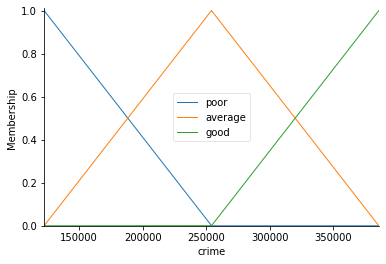

In [ ]:
crimef.view()

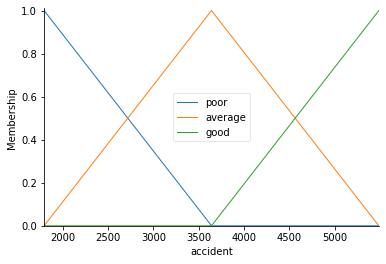

In [ ]:
accidentf.view()

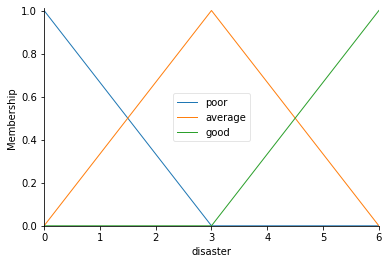

In [ ]:
disasterf.view()

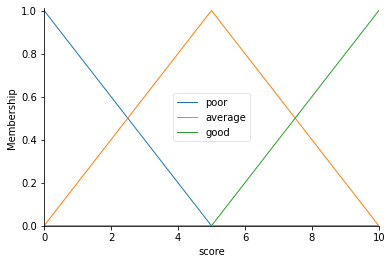

In [ ]:
scoref.view()

In [ ]:
#Fuzzy Rules
#disaster > accident > crime
#Poor < average < good
# rule1 = ctrl.Rule(disasterf['good'], scoref['good'])
# rule2 = ctrl.Rule(crimef['poor'] & accidentf['poor'] & disasterf['good'], scoref['average'])
# rule3 = ctrl.Rule(disasterf['average'] & accidentf['good'], scoref['good'])
# rule4 = ctrl.Rule(disasterf['average'] & accidentf['average'] & (crimef['poor'] | crimef['average']), scoref['average'])
# rule5 = ctrl.Rule(disasterf['average'] & accidentf['poor'] & (crimef['average'] | crimef['good']), scoref['average'])
# rule6 =ctrl.Rule(accidentf['poor'] & crimef['poor'] & (disasterf['poor'] | disasterf['average']), scoref['poor'])
# rule7 = ctrl.Rule(disasterf['poor'] & accidentf['good'] & (crimef['average'] | crimef['good']), scoref['good'])
# rule8 = ctrl.Rule(disasterf['poor'] & crimef['poor'] & accidentf['good'], scoref['average'])
# rule9 = ctrl.Rule(disasterf['poor'] & accidentf['average'] & (crimef['average'] & crimef['average']), scoref['average'])
# rule10 = ctrl.Rule(disasterf['poor'] & accidentf['average'] & crimef['poor'], scoref['poor'])
# rule11 = ctrl.Rule(disasterf['poor'] & accidentf['poor'] & (crimef['average'] & crimef['poor']), scoref['poor'])
# rule12 = ctrl.Rule(disasterf['poor'] & accidentf['poor'] & crimef['good'], scoref['average'])

rule1 = ctrl.Rule(disasterf['poor'] & accidentf['poor'] & crimef['poor'], scoref['poor'])
rule2 = ctrl.Rule(disasterf['poor'] & accidentf['poor'] & crimef['average'], scoref['poor'])
rule3 = ctrl.Rule(disasterf['poor'] & accidentf['poor'] & crimef['good'], scoref['average'])
rule4 = ctrl.Rule(disasterf['poor'] & accidentf['average'] & crimef['poor'], scoref['poor'])
rule5 = ctrl.Rule(disasterf['poor'] & accidentf['average'] & crimef['average'], scoref['average'])
rule6 = ctrl.Rule(disasterf['poor'] & accidentf['average'] & crimef['good'], scoref['average'])
rule7 = ctrl.Rule(disasterf['poor'] & accidentf['good'] & crimef['poor'], scoref['average'])
rule8 = ctrl.Rule(disasterf['poor'] & accidentf['good'] & crimef['average'], scoref['good'])
rule9 = ctrl.Rule(disasterf['poor'] & accidentf['good'] & crimef['good'], scoref['good'])

rule10 = ctrl.Rule(disasterf['average'] & accidentf['poor'] & crimef['poor'], scoref['poor'])
rule11 = ctrl.Rule(disasterf['average'] & accidentf['poor'] & crimef['average'], scoref['average'])
rule12 = ctrl.Rule(disasterf['average'] & accidentf['poor'] & crimef['good'], scoref['average'])
rule13 = ctrl.Rule(disasterf['average'] & accidentf['average'] & crimef['poor'], scoref['average'])
rule14 = ctrl.Rule(disasterf['average'] & accidentf['average'] & crimef['average'], scoref['average'])
rule15 = ctrl.Rule(disasterf['average'] & accidentf['average'] & crimef['good'], scoref['good'])
rule16 = ctrl.Rule(disasterf['average'] & accidentf['good'] & crimef['poor'], scoref['good'])
rule17 = ctrl.Rule(disasterf['average'] & accidentf['good'] & crimef['average'], scoref['good'])
rule18 = ctrl.Rule(disasterf['average'] & accidentf['good'] & crimef['good'], scoref['good'])

rule19 = ctrl.Rule(disasterf['good'] & accidentf['poor'] & crimef['poor'], scoref['average'])
rule20 = ctrl.Rule(disasterf['good'] & accidentf['poor'] & crimef['average'], scoref['good'])
rule21 = ctrl.Rule(disasterf['good'] & accidentf['poor'] & crimef['good'], scoref['good'])
rule22 = ctrl.Rule(disasterf['good'] & accidentf['average'] & crimef['poor'], scoref['good'])
rule23 = ctrl.Rule(disasterf['good'] & accidentf['average'] & crimef['average'], scoref['good'])
rule24 = ctrl.Rule(disasterf['good'] & accidentf['average'] & crimef['good'], scoref['good'])
rule25 = ctrl.Rule(disasterf['good'] & accidentf['good'] & crimef['poor'], scoref['good'])
rule26 = ctrl.Rule(disasterf['good'] & accidentf['good'] & crimef['average'], scoref['good'])
rule27 = ctrl.Rule(disasterf['good'] & accidentf['good'] & crimef['good'], scoref['good'])

# rule1 = ctrl.Rule(crimef['poor'] | accidentf['poor'], scoref['poor'])
# rule2 = ctrl.Rule(crimef['average'] & accidentf['average'], scoref['average'])
# rule3 = ctrl.Rule(crimef['good'] | accidentf['good'], scoref['good'])

In [ ]:
score_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27])
# score_control = ctrl.ControlSystem([rule1, rule2, rule3])

In [ ]:
score_calc = ctrl.ControlSystemSimulation(score_control)

In [ ]:
def getStateScore(statedat):
  scores  = []

  crimef = ctrl.Antecedent(np.arange(statedat['Crime'].min(), statedat['Crime'].max()+1, 1), 'crime')
  accidentf = ctrl.Antecedent(np.arange(statedat['Accident'].min(), statedat['Accident'].max()+1, 1), 'accident')
  disasterf = ctrl.Antecedent(np.arange(statedat['Disaster'].min()-1, statedat['Disaster'].max()+1, 1), 'disaster')
  scoref = ctrl.Consequent(np.arange(0,11,1), 'score')
  crimef.automf(3)
  accidentf.automf(3)
  disasterf.automf(3)
  scoref.automf(3)
  
  rule1 = ctrl.Rule(disasterf['poor'] & accidentf['poor'] & crimef['poor'], scoref['poor'])
  rule2 = ctrl.Rule(disasterf['poor'] & accidentf['poor'] & crimef['average'], scoref['poor'])
  rule3 = ctrl.Rule(disasterf['poor'] & accidentf['poor'] & crimef['good'], scoref['average'])
  rule4 = ctrl.Rule(disasterf['poor'] & accidentf['average'] & crimef['poor'], scoref['poor'])
  rule5 = ctrl.Rule(disasterf['poor'] & accidentf['average'] & crimef['average'], scoref['average'])
  rule6 = ctrl.Rule(disasterf['poor'] & accidentf['average'] & crimef['good'], scoref['average'])
  rule7 = ctrl.Rule(disasterf['poor'] & accidentf['good'] & crimef['poor'], scoref['average'])
  rule8 = ctrl.Rule(disasterf['poor'] & accidentf['good'] & crimef['average'], scoref['good'])
  rule9 = ctrl.Rule(disasterf['poor'] & accidentf['good'] & crimef['good'], scoref['good'])

  rule10 = ctrl.Rule(disasterf['average'] & accidentf['poor'] & crimef['poor'], scoref['poor'])
  rule11 = ctrl.Rule(disasterf['average'] & accidentf['poor'] & crimef['average'], scoref['average'])
  rule12 = ctrl.Rule(disasterf['average'] & accidentf['poor'] & crimef['good'], scoref['average'])
  rule13 = ctrl.Rule(disasterf['average'] & accidentf['average'] & crimef['poor'], scoref['average'])
  rule14 = ctrl.Rule(disasterf['average'] & accidentf['average'] & crimef['average'], scoref['average'])
  rule15 = ctrl.Rule(disasterf['average'] & accidentf['average'] & crimef['good'], scoref['good'])
  rule16 = ctrl.Rule(disasterf['average'] & accidentf['good'] & crimef['poor'], scoref['good'])
  rule17 = ctrl.Rule(disasterf['average'] & accidentf['good'] & crimef['average'], scoref['good'])
  rule18 = ctrl.Rule(disasterf['average'] & accidentf['good'] & crimef['good'], scoref['good'])

  rule19 = ctrl.Rule(disasterf['good'] & accidentf['poor'] & crimef['poor'], scoref['average'])
  rule20 = ctrl.Rule(disasterf['good'] & accidentf['poor'] & crimef['average'], scoref['good'])
  rule21 = ctrl.Rule(disasterf['good'] & accidentf['poor'] & crimef['good'], scoref['good'])
  rule22 = ctrl.Rule(disasterf['good'] & accidentf['average'] & crimef['poor'], scoref['good'])
  rule23 = ctrl.Rule(disasterf['good'] & accidentf['average'] & crimef['average'], scoref['good'])
  rule24 = ctrl.Rule(disasterf['good'] & accidentf['average'] & crimef['good'], scoref['good'])
  rule25 = ctrl.Rule(disasterf['good'] & accidentf['good'] & crimef['poor'], scoref['good'])
  rule26 = ctrl.Rule(disasterf['good'] & accidentf['good'] & crimef['average'], scoref['good'])
  rule27 = ctrl.Rule(disasterf['good'] & accidentf['good'] & crimef['good'], scoref['good'])

  score_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27])

  score_calc = ctrl.ControlSystemSimulation(score_control)
  for i, j in statedat.iterrows():
    
    #checking on mean values
    score_calc.input['disaster'] = j.Disaster
    score_calc.input['accident'] = j.Accident
    score_calc.input['crime'] = j.Crime

    score_calc.compute()

    # print(score_calc.output['score'])
    scores.append(10 - score_calc.output['score'])

  # print(scores)
  statedat['Score'] = scores
  return statedat

#checking on mean values
# score_calc.input['disaster'] = j.Disaster
# score_calc.input['accident'] = j.Accident
# score_calc.input['crime'] = j.Crime

# score_calc.compute()
# print(score_calc.output['score'])


In [ ]:
plt.plot(statedat['YEAR'], statedat['Score'])

KeyError: ignored

In [ ]:
plt.plot(statedat['YEAR'], statedat['Crime'], )

In [ ]:
plt.plot(statedat['YEAR'], statedat['Accident'])

In [ ]:
plt.plot(statedat['YEAR'], statedat['Disaster'])

In [ ]:
print(score_calc.output['score'])
scoref.view(sim=score_calc)

##Test for disaster

In [ ]:
prediction = np.zeros(6)
for d in range(statedat['Disaster'].min(), statedat['Disaster'].max()+1):
  score_calc.input['disaster'] = d
  score_calc.input['accident'] = statedat['Accident'].mean()
  score_calc.input['crime'] = statedat['Crime'].mean()
  print(d)
  score_calc.compute()
  print(score_calc.output['score'])
  prediction[d-1] = score_calc.output['score']  


In [ ]:
plt.plot([1,2,3,4,5,6], prediction, 'k')
plt.xlabel('Disaster count')
plt.ylabel('Disaster score')
plt.savefig('disaster.png')

##Test for accident

In [ ]:
prediction = np.zeros(10000)
for d in range(int(statedat['Accident'].min()), int(statedat['Accident'].max()+1)):
  score_calc.input['disaster'] = statedat['Disaster'].mean()
  score_calc.input['accident'] = d
  score_calc.input['crime'] = statedat['Crime'].mean()
  print(d)
  score_calc.compute()
  print(score_calc.output['score'])
  prediction[d-1] = score_calc.output['score']  

In [ ]:
plt.plot(np.arange(statedat['Accident'].min(), statedat['Accident'].max()+1, 1), prediction[1792:5489], 'k')
plt.xlabel('Accident count')
plt.ylabel('Danger score')
plt.savefig('accident.png')

##Test for crime

In [ ]:
prediction = np.zeros(500000)
for d in range(int(statedat['Crime'].min()), int(statedat['Crime'].max()+1), 100):
  score_calc.input['disaster'] = statedat['Disaster'].mean()
  score_calc.input['accident'] = statedat['Accident'].mean()
  score_calc.input['crime'] = d
  score_calc.compute()
  prediction[d-1] = score_calc.output['score']  

In [ ]:
statedat['Crime'].min()

In [ ]:
statedat['Crime'].max()

In [ ]:
score_calc.output['score']

In [ ]:
plt.plot(np.arange(statedat['Crime'].min(), statedat['Crime'].max()+1, 1), prediction[122347:386096])
plt.xlabel('Crime count')
plt.ylabel('Disaster score')
plt.savefig('crime.png')

In [ ]:
score_calc.input['disaster'] = statedat['Disaster'].mean()
score_calc.input['accident'] = statedat['Accident'].mean()
score_calc.input['crime'] = 370000
score_calc.compute()
score_calc.output['score']  

###Safer/dangerous predictor

In [ ]:
wb = getStateData('West Bengal')

In [ ]:
wb[-6:]

,STATE/UT,YEAR,Accident,Crime,Disaster
6,WEST BENGAL,2009,4135.0,226072,3
7,WEST BENGAL,2010,4975.0,259232,1
8,WEST BENGAL,2011,5107.0,286394,2
9,WEST BENGAL,2012,4911.0,322854,1
10,WEST BENGAL,2013,5077.0,339070,3
11,WEST BENGAL,2014,5489.0,386096,1


In [ ]:
wb = getStateScore(wb)

In [ ]:
wb[-6:]

,STATE/UT,YEAR,Accident,Crime,Disaster,Score
6,WEST BENGAL,2009,4135.0,226072,3,4.815636
7,WEST BENGAL,2010,4975.0,259232,1,3.728556
8,WEST BENGAL,2011,5107.0,286394,2,3.449420
9,WEST BENGAL,2012,4911.0,322854,1,4.069670
10,WEST BENGAL,2013,5077.0,339070,3,3.554211
11,WEST BENGAL,2014,5489.0,386096,1,1.805556


In [ ]:
def predict(name, num):
  wb = getStateData(name)
  wb = getStateScore(wb)
  x = wb['Score'][(wb.shape[0]-num-1):-1]
  mean = x.mean()
  print("mean of Safety values from 2009 to 2013 = "+str(mean))
  print("Safety value of "+name+" in 2014 is "+str(wb['Score'][11]))
  safe = ((mean-wb['Score'][wb.shape[0]-1])/mean)*100
  if(safe>=0):
    print("State "+name+" got "+str(safe)+"% dangerous")
  else:  
    print("State "+name+" got "+str(-safe)+"% safer")

In [ ]:
predict('West bengal',5)

mean of Safety values from 2009 to 2013 = 3.923498437856902
Safety value of West bengal in 2014 is 1.8055555555555554
State West bengal got 53.98097936947853% dangerous


In [ ]:
predict('Bihar', 5)

mean of Safety values from 2009 to 2013 = 2.1774852482847082
Safety value of Bihar in 2014 is 2.991750702966745
State Bihar got 37.39476330888882% safer
